In [1]:
#       BLG 443E
# Descrete Event Simulation
#     Assignment 1
#   Emre Reyhanlıoğlu
#      150140126

In [2]:
from random import randint, gauss, uniform
from matplotlib.pyplot import hist, show, xlim
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def gender():
    r=randint(0,1)
    if(r==0):
        return "Male"
    else:
        return "Female"

In [4]:
def num_females(n):
    femaleCounter=0
    a = list()
    gndr =""
    
    
    array_gender = ('Female', 'Male')
    for i in range(0,n):
        gndr = gender() 
        if(gndr == "Female"):
            femaleCounter+=1
            
    a.append(femaleCounter)
    a.append(n-femaleCounter)
            
    y_pos = np.arange(len(array_gender))
    plt.bar(y_pos, a)
    plt.xticks(y_pos, array_gender)
    plt.xlabel('Gender')
    plt.ylabel('Number of People')
            

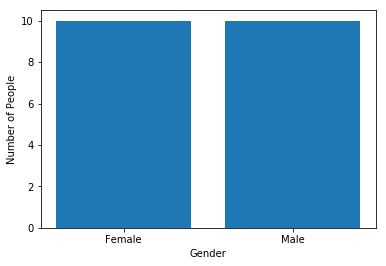

In [5]:
num_females(20) 

In [6]:
def  female_height():
    mu =  158.9
    sigma = 0.6
    height = gauss(mu, sigma)
    return height

In [7]:
def  male_height():
    mu =  174.1
    sigma = 0.7
    height = gauss(mu, sigma)
    return height
 

In [8]:
def test_female_height(n):
    list_height = list()
    
    for i in range(0,n):
        list_height.append(female_height())

    hist(list_height,bins=30)
    plt.xlabel('Female Heights')
    plt.ylabel('Frequency')
    show()
    return list_height

In [9]:
def test_male_height(n):
    list_height = list()
    
    for i in range(0,n):
        list_height.append(male_height())

    hist(list_height,bins=30)
    plt.xlabel('Male Heights')
    plt.ylabel('Frequency')
    show()
    return list_height

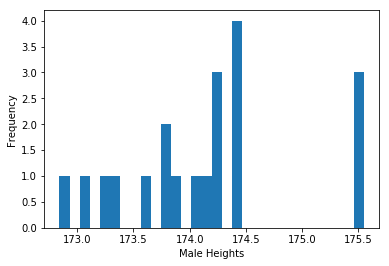

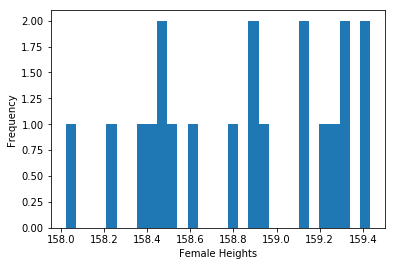

In [10]:
test_male_height(20);
test_female_height(20);

In [11]:
def  expected_height_by_gender(gender, n):
    m_height = list()
    f_height = list()
    
    if(gender == "Male"):
        for i in range(0,n):
            m_height.append(male_height())
        return sum(m_height)/n
    
    elif(gender == "Female"):
        for i in range(0,n):
            f_height.append(female_height())
        return sum(f_height)/n
    
    else:
        return -1

In [12]:
expected_height_by_gender("Female", 20)

158.71283226248764

In [13]:
#COMPARING TWO HISTOGRAMS
def test_expected_female_heights(n):
    average_female_heights = list()

    for i in range(0,n):
        average_female_heights.append(expected_height_by_gender("Female", n))
    
    hist(average_female_heights,bins=30)
    plt.xlabel('Averages of Female Heights')
    show()
    
    test_female_height(n)
    


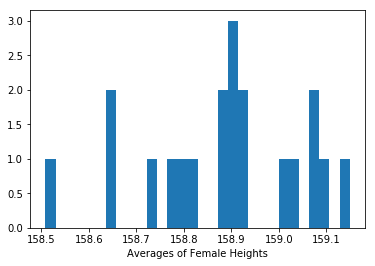

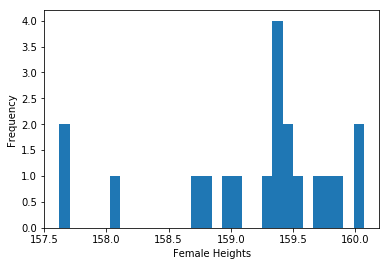

In [14]:
test_expected_female_heights(20)
# Yes there is a differencee in these two histograms
# Theoretically, it should be a difference too because first histogram shows 
# the average of heights but second one just shows heights. 
# These are different concepts.

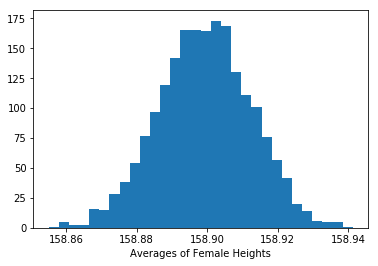

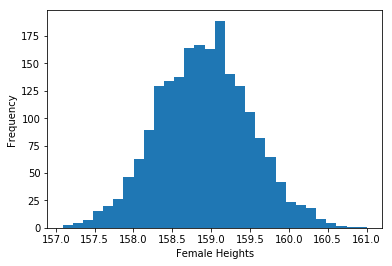

In [15]:
test_expected_female_heights(2000)
# When I increase the n, these histograms became more similar as I expected.
# Averages of heights and heights are different concepts but
# if n goes to infinity, these histograms should look like same.


In [16]:
def expected_height(n):
    total_height=0
    
    for i in range(0,n):
        g = gender()
        
        if(g == "Male"):
            total_height += male_height()
        else:
            total_height += female_height()
        
    return total_height/n

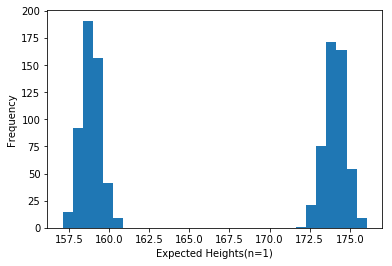

In [17]:
#PLOTTING THE HISTOGRAM OF expected_height FUNCTION for n=1
# My data contains heights of people which are male or female(because n=1),
# consequently histogram will show males and females seperately

array = []
for i in range(0,1000):
    array.append(expected_height(1))

hist(array, bins=30)
plt.xlabel('Expected Heights(n=1)')
plt.ylabel('Frequency')
show()

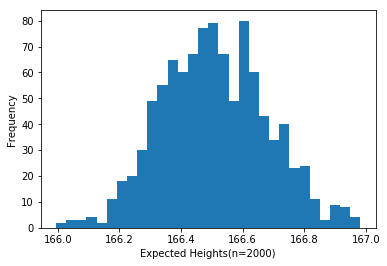

In [18]:
#PLOTTING THE HISTOGRAM OF expected_height FUNCTION for n=2000
# This time our data contains averages of random 2000 people,
# consequently this graph should be distributed between females' and males' 
# distribution and theoretically, mean should be (174.1+158.9)/2 =166.5

array = []
for i in range(0,1000):
    array.append(expected_height(2000))

hist(array, bins=30)
plt.xlabel('Expected Heights(n=2000)')
plt.ylabel('Frequency')
show()

In [19]:
# PART 2

In [20]:
#PART 2.1
#Defining inter arrival time function 

def inter_arrival():
    return uniform(0,3)

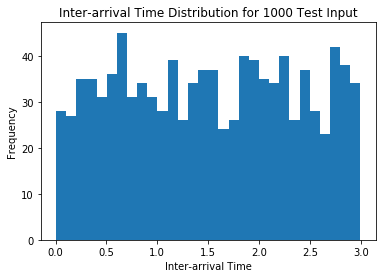

In [21]:
#PART 2.2
#Testing inter arrival time with 1000 input

a0 = []
for i in range(0,1000):
    a0.append(inter_arrival())
hist(a0, bins=30)
plt.title('Inter-arrival Time Distribution for 1000 Test Input')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')
show()

In [22]:
#PART 2.3
#Defining delivery time and time to rot of cabbages functions

def delivery_time():
    return uniform(1,15)

def decay_time():
    return uniform(7,12)



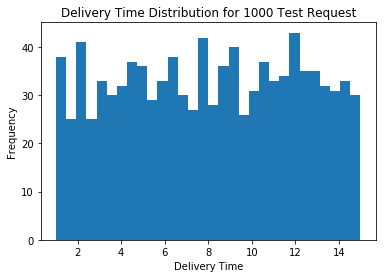

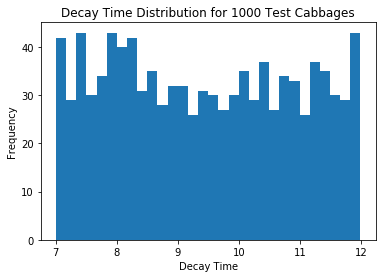

In [23]:
#Testing delivery_time() and decay_time() functions

a1 = []
for i in range(0,1000):
    a1.append(delivery_time())
hist(a1, bins=30)
plt.title('Delivery Time Distribution for 1000 Test Request')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
show()

a2 = []
for i in range(0,1000):
    a2.append(decay_time())
hist(a2, bins=30)
plt.title('Decay Time Distribution for 1000 Test Cabbages')
plt.xlabel('Decay Time')
plt.ylabel('Frequency')
show()


In [24]:
# WRITING A CLASS TO HANDLE THIS SIMUlATION

#  There are two main events for simulation:
#  1)customer arrives
#  2)reordered cabbage arrives
#
# I will put all of the events in a event list and sort them by their time values
# and process them in order. When an event processed, I pop it from event list.
# Whenever customer arrives, I will check cabbages' decay time, update number of cabbages and 
# update refused_customer variable if necessery
# I assumed that cabbages are transported in freezer, so their decay time starts when it delivered.

class Event:
    def __init__(self, name, time):
        self.name = name
        self.time = time

class Cabbage:
    def __init__(self, arrival_time):
        self.decayTime = arrival_time + decay_time()
        

class CabbageShop:    
    
    #Constructor
    def __init__(self, n, initialNumberOfCabbages):
        self.number_of_customer = n
        self.number_of_cabbages = initialNumberOfCabbages
        self.numberOfCabbagesInTime = []
        self.room_capacity = 40
        self.sold_cabbages = 0
        self.rotten_cabbages = 0
        self.refused_customer = 0
        self.room_capacity_exceeded = 0
        self.cabbages = []
        self.events = []
        for i in range(0, initialNumberOfCabbages):
            self.cabbages.append(Cabbage(0))
    
    #Destructor
    def __del__(self):
        self.cabbages.clear()
        self.events.clear()
        
    
    
    # This method checks all of the cabbages for input time,
    # throws away rotten cabbages, reorders a cabbage and increases rotten_cabbages variable by 1
    def checkCabbages(self, time):
        
        rottenList = []
        for i in range(0, self.number_of_cabbages-1 ):
            if(self.cabbages[i].decayTime <= time):
                self.events.append(Event("reordered cabbage arrives", self.cabbages[i].decayTime + delivery_time()))
                self.rotten_cabbages += 1
                rottenList.append(i)
                
       
        numberOfRottens = len(rottenList)      
        for i in range(0, numberOfRottens-1):
            self.cabbages.pop(rottenList[numberOfRottens-1-i])
            self.number_of_cabbages -=1
        
        self.sortEventsByTime()    
    
    
    def sellOneCabbagePickedRandomly(self):
        randomIndex = randint(0, self.number_of_cabbages-1)
        self.cabbages.pop(randomIndex)
        self.number_of_cabbages -=1
        self.sold_cabbages += 1
    
    
    def sortEventsByTime(self):
        self.events = sorted(self.events, key=lambda Event: Event.time) 
    
    
    def addEvents(self):
        arrival_time = 0
        for i in range(0, self.number_of_customer):
            arrival_time += inter_arrival()
            self.events.append(Event("customer arrives", arrival_time))
            self.events.append(Event("reordered cabbage arrives", arrival_time + delivery_time()))
        self.sortEventsByTime()
                     
    
    def handleEvent(self, event):
        if(event.name == "customer arrives"):
            self.checkCabbages(event.time)
            if(self.number_of_cabbages > 0):
                self.sellOneCabbagePickedRandomly()
            else:
                self.refused_customer += 1
                
        if(event.name == "reordered cabbage arrives") :
            if(self.number_of_cabbages < self.room_capacity):
                self.number_of_cabbages += 1
                self.cabbages.append(Cabbage(event.time))
            else:
                self.room_capacity_exceeded += 1

    
    #This method simulates all of the events and returns average number of cabbages in stock
    def simulate(self):
        self.addEvents()
        
        while(len(self.events)>0):
            self.handleEvent(self.events[0])
            self.events.pop(0)
            self.numberOfCabbagesInTime.append(self.number_of_cabbages)
            
        return sum(self.numberOfCabbagesInTime)/len(self.numberOfCabbagesInTime)
    
     
    #This method prints the graph that shows changes in number of cabbages for events
    def printGraph(self):
        plt.clf()
        plt.plot(self.numberOfCabbagesInTime)
        plt.title('SIMULATION GRAPH')
        plt.xlabel('Number of Events for 1000 Customer')
        plt.ylabel('Number of Fresh Cabbages in Stock')
        show()
            
    
        

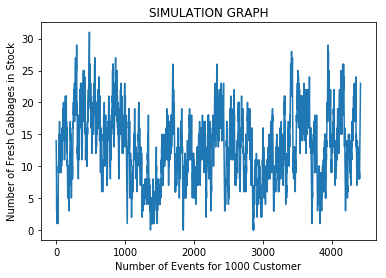

Number of refused customer = 0


In [25]:
cabbageShop = CabbageShop(1000,15)
cabbageShop.simulate()
cabbageShop.printGraph()
print("Number of refused customer =", cabbageShop.refused_customer)

if(cabbageShop.room_capacity_exceeded > 0):
    print(cabbageShop.room_capacity_exceeded, "cabbage could not put into room, because room was full with",cabbageShop.room_capacity,"cabbages.")

In [32]:
# Test fuction of the simulation for n times with initial number of cabbages parameter  
# for 1000 customers to observe the number of refused customers 

def run_simulation_n_times(n, cabbages, printGraph):
    refusedCustomers = []
    averageNumberOfRefusedCustomers = 0
    numberOfRottenCabbages = []
    averageNumberOfRottenCabbages = 0
    soldCabbages = []
    averageSoldCabbages = 0
    
    for i in range(0,n):
        cabbageShop = CabbageShop(1000,cabbages)
        cabbageShop.simulate()
        numberOfRottenCabbages.append(cabbageShop.rotten_cabbages)
        refusedCustomers.append(cabbageShop.refused_customer)
        soldCabbages.append(cabbageShop.sold_cabbages)
    
    averageNumberOfRefusedCustomers  = sum(refusedCustomers)/len(refusedCustomers)
    averageNumberOfRottenCabbages = sum(numberOfRottenCabbages)/len(numberOfRottenCabbages)
    averageSoldCabbages = sum(soldCabbages)/len(soldCabbages)
    
    if(printGraph == "true"):
        plt.clf()
        plt.plot(refusedCustomers)
        plt.axis([0, len(refusedCustomers), 0, max(refusedCustomers)])
        plt.title("Histogram of Refused Customers in n Simulation")
        plt.xlabel('Simulations')
        plt.ylabel('Number of Refused Customers')
        show()
        print("Average Number of Refused Customers for",cabbages,"cabbages in",n,"Simulation is", averageNumberOfRefusedCustomers)
        
    
    return averageNumberOfRefusedCustomers
    
    
    
    


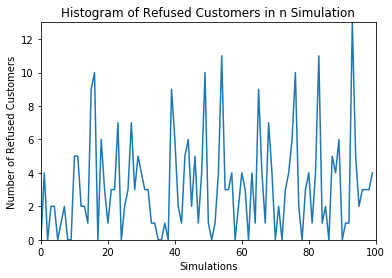

Average Number of Refused Customers for 8 cabbages in 100 Simulation is 3.21


In [33]:
run_simulation_n_times(100, 8, "true");

In [34]:
# This function runs function run_simulation_n_times(50, cabbages) to find the minimum value
# of cabbages variable for given upper bound of refused_customer_max which is '3' for this assignment

def give_me_suggestion(refused_customer_max):
    average = 0
    for i in range(0,40):
        average = run_simulation_n_times(50,i,"false")
        if(average < refused_customer_max):
            print("The average number of refused customer is",average,"which is good enough for",i,"cabbages.")
            print("You should stock ",i," cabbages in the room initially.")
            return i
    

In [35]:
#Note: This function takes time(approximately 1-2 min.) because I'm running it 50 times for different number of cabbages
# I have also set 50 to 500 and the result was 9 cabbages with 2.996 average 
# number of refused customers but it takes 10-15 minutes.
# Consequently, 9 initial cabbage should be fine experimentally.

give_me_suggestion(3);

The average number of refused customer is 2.6 which is good enough for 8 cabbages.
You should stock  8  cabbages in the room initially.


In [ ]:
#CONCLUSION

# Firstly, I couldn't follow all of the step by step suggestions for example writing a class was easier 
# for me to handle the problem, because of that I couldn't show some steps in part two.
# I hope my object oriented design won't be a problem.
# For the simulation part, my assumption was cabbages are transported in freezer, 
# so their decay time starts when it delivered
# Finally, in my simulation, I found out that minimum initial number of cabbages should be 9.


# @Author
# Emre Reyhanlıoğlu
# 150140126